# Open Street Maps

Notebook in progress - OSM
Information: https://janakiev.com/blog/openstreetmap-with-python-and-overpass-api/

List of amenities: https://wiki.openstreetmap.org/wiki/Key:amenity

Overpass API. Information here:https://github.com/mvexel/overpass-api-python-wrapper

In [2]:
#!pip install OSMPythonTools
#!pip install overpy
import overpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from OSMPythonTools.nominatim import Nominatim
from OSMPythonTools.overpass import Overpass, overpassQueryBuilder
from OSMPythonTools.data import Data, dictRangeYears, ALL
from collections import OrderedDict

overpass = Overpass()
api = overpy.Overpass()

In [3]:


def fetch(year, city, typeOfRoad):
    areaId = nominatim.query(city).areaId()
    query = overpassQueryBuilder(area=areaId, elementType='node', selector='"amenity"="' + type_amenity + '"', out='body')
    return overpass.query(query, date=year, timeout=60).countElements()

850


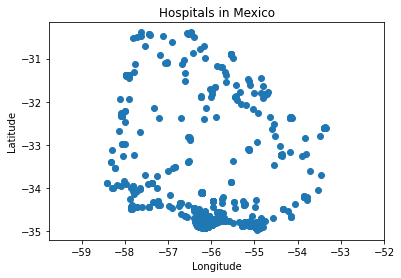

In [5]:
query = """
        area["ISO3166-1"="UY"]->.a;
        ( node(area.a)[amenity=school];
          way(area.a)[amenity=school];
          rel(area.a)[amenity=school];);
        out center;
        """
r = api.query(query)
coords  = []
coords += [(float(node.lon), float(node.lat))  for node in r.nodes]
coords += [(float(way.center_lon), float(way.center_lat)) 
           for way in r.ways]
coords += [(float(rel.center_lon), float(rel.center_lat)) 
           for rel in r.relations]

print(len(coords))
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Hospitals in Mexico')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [8]:
hospitals = pd.DataFrame(X)
hospitals.head() 

,0,1
0,-105.231833,20.638359
1,-100.349779,25.716053
2,-100.349599,25.688791
3,-92.636879,16.732909
4,-110.952054,29.104814


# Api Query

- Standard -  use alpha 3 - ISO3166-1:alpha3	
- Not sure what is the use of admin_level (admin_level =1 country)

# Check overpass query builder

In [66]:
area_string = 'México'
isoalpha3='MEX'
amenity='hospital'
level='0'
        
def get_nodes(area_string, amenity):
    nominatim = Nominatim()
    city = nominatim.query(area_string)
    city.areaId()

    query = overpassQueryBuilder(area=city.areaId(), elementType='node',
                                 selector='"amenity"="{0}"'.format(amenity), out='body', 
                                 includeGeometry=True 
    )

    overpass = Overpass()
    output = overpass.query(query)

    output_db = pd.DataFrame([{"id":x.id(), 'tags': x.tags(),
                            'lat': x.lat(), 'lon': x.lon(),
                            'geometry': x.geometry()} for x in output.nodes()])
    return output_db

output = get_nodes(area_string, amenity)
output.head()
len(output)

1220

In [104]:
# Save example to test isochrones
output.to_csv('../data/SPH/{isoalpha3}/{amenity}_{level}.csv'.format(isoalpha3=isoalpha3,
                                                                     amenity=amenity,
                                                                     level= level))

# Test with OSMX

Notes - Too slow for our project

<AxesSubplot:>

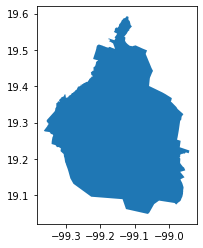

In [23]:
#!pip install osmnx
import osmnx as ox

place = 'Ciudad de México'
city = ox.geocode_to_gdf(place)
city.plot()

In [24]:
tags = {'amenity' : ['hospital']}
amenities = ox.geometries_from_place(place, tags=tags)
amenities.head()

amenity      created_by  \
element_type osmid                                 
node         319436637  hospital  Potlatch 0.10f   
             331600009  hospital             NaN   
             474727308  hospital             NaN   
             648638165  hospital             NaN   
             700231579  hospital             NaN   

                                                      name  \
element_type osmid                                           
node         319436637              Hospital San Angel Inn   
             331600009                      Santa Teresita   
             474727308                                IMSS   
             648638165  Hospital San Ángel Inn Chapultepec   
             700231579                     Clínica 23 IMSS   

                                          geometry     addr:city addr:country  \
element_type osmid                                                              
node         319436637  POINT (-99.19984 19.34035)           NaN          NaN   
             331600009  POINT (-99.20635 19.42230)  Cd de México           MX   
             474727308  POINT (-99.16158 19.39590)           NaN          NaN   
             648638165  POINT (-99.17298 19.42171)           NaN          NaN   
             700231579  POINT (-99.09655 19.47774)           NaN          NaN   

                       addr:housenumber addr:postcode  \
element_type osmid                                      
node         319436637              NaN           NaN   
             331600009               26         11000   
             474727308              NaN           NaN   
             648638165              NaN           NaN   
             700231579              NaN           NaN   

                                      addr:street healthcare  ...  \
element_type osmid                                            ...   
node         319436637                        NaN        NaN  ...   
             331600009  Calle Acueducto Río Hondo        NaN  ...   
             474727308                        NaN        NaN  ...   
             648638165                        NaN   hospital  ...   
             700231579                        NaN   hospital  ...   

                       contact:email contact:phone  ele smoking source  \
element_type osmid                                                       
node         319436637           NaN           NaN  NaN     NaN    NaN   
             331600009           NaN           NaN  NaN     NaN    NaN   
             474727308           NaN           NaN  NaN     NaN    NaN   
             648638165           NaN           NaN  NaN     NaN    NaN   
             700231579           NaN           NaN  NaN     NaN    NaN   

                       short_name addr:unit area ways type  
element_type osmid                                          
node         319436637        NaN       NaN  NaN  NaN  NaN  
             331600009        NaN       NaN  NaN  NaN  NaN  
             474727308        NaN       NaN  NaN  NaN  NaN  
             648638165        NaN       NaN  NaN  NaN  NaN  
             700231579        NaN       NaN  NaN  NaN  NaN  

[5 rows x 53 columns]

In [25]:
len(amenities)

252

Changing admin_level = 4 gives us states, 6 municipal border, 8 city/town limit. (here =4 and querying CDMX) (here you can find admin_level by country https://wiki.openstreetmap.org/wiki/Tag:boundary%3Dadministrative#admin_level.3D.2A_Country_specific_values)

In [14]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-2"="MX-CMX"][admin_level=4];
(node["amenity"="hospital"](area);
 way["amenity"="hospital"](area);
 rel["amenity"="hospital"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

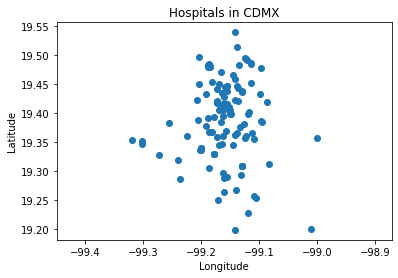

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Hospitals in CDMX')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [16]:
print(len(coords))

124


In [30]:
r = api.query("""
    area["ISO3166-2"="MX-CMX"][admin_level=4];
    (node["amenity"="hospital"](area););
    out center;
""")
coords = pd.DataFrame([{'id': node.id, 'lon': node.lon, 'lat': node.lat} 
                       for node in r.nodes]).reset_index()
metadata  = pd.DataFrame([node.tags
                          for node in r.nodes]).reset_index()
output = coords.merge(metadata, on='index').drop('index', axis=1)
output.head()

,id,lon,lat,amenity,created_by,name,addr:city,addr:country,addr:housenumber,addr:postcode,...,alt_name,wheelchair,note,designation,opening_hours,name:es,name:zh,email,operator:type,description
0,319436637,-99.1998410,19.3403526,hospital,Potlatch 0.10f,Hospital San Angel Inn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,331600009,-99.2063529,19.4223048,hospital,NaN,Santa Teresita,Cd de México,MX,26,11000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,474727308,-99.1615782,19.3959048,hospital,NaN,IMSS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,648638165,-99.1729820,19.4217120,hospital,NaN,Hospital San Ángel Inn Chapultepec,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,700231579,-99.0965541,19.4777416,hospital,NaN,Clínica 23 IMSS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
def get_country_amenity(isoalpha3, amenity):   
    """
    """
    query = f'''
            area["ISO3166-1:alpha3"="{isoalpha3}"]->.a;
            ( node(area.a)[amenity={amenity}];
              way(area.a)[amenity={amenity}];
              rel(area.a)[amenity={amenity}];);
            out center;
            '''
    r = api.query(query)
    
    coords_node = pd.DataFrame([{'id': node.id, 
                                 'lon': node.lon, 'lat': node.lat} 
                           for node in r.nodes]).reset_index()
    coords_way = pd.DataFrame([{'id': way.id, 'lon': way.center_lon, 'lat': way.center_lat}
                              for way in r.ways]).reset_index()
    coords_relation = pd.DataFrame([{'id': relation.id, 'lon': relation.center_lon, 'lat': relation.center_lat}
                              for relation in r.relations]).reset_index()

    metadata_node =  pd.DataFrame([node.tags
                              for node in r.nodes]).reset_index()
    metadata_way = pd.DataFrame([way.tags
                              for way in r.ways]).reset_index()
    metadata_relation = pd.DataFrame([way.tags
                              for way in r.relations]).reset_index()

    output_node = coords_node.merge(metadata_node, on='index').drop('index', axis=1)
    output_way = coords_way.merge(metadata_way, on='index').drop('index', axis=1)
    output_relation = coords_relation.merge(metadata_relation, on='index').drop('index', axis=1)
    output_tot = pd.concat([output_node, output_way, output_relation])
    
    return output_tot

In [46]:
amenity = 'hospital'
isoalpha3 = 'MEX'
output_test = get_country_amenity(isoalpha3, amenity)

In [44]:
len(output_test)

2764

In [50]:
amenities = ['clinic', 'hospital']
isoalpha3 = 'MEX'
output_test2 = get_country_amenities(isoalpha3, amenities)

In [51]:
len(output_test2)

4231

In [40]:
len(output)

4231